In [ ]:
import sys
assert sys.version_info >= (3, 7)

from packaging import version 
import sklearn
assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

import tensorflow as tf 
assert version.parse(tf.__version__) >= version.parse("2.8.0")

import matplotlib.pyplot as plt 

plt.rc("font", size = 14)
plt.rc("axes", labelsize = 14, titlesize = 14)
plt.rc("legend", fontsize = 14)
plt.rc("xtick", labelsize = 12)
plt.rc("ytick", labelsize = 12)

tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
sys.modules

{'sys': <module 'sys' (built-in)>,
 'builtins': <module 'builtins' (built-in)>,
 '_frozen_importlib': <module '_frozen_importlib' (frozen)>,
 '_imp': <module '_imp' (built-in)>,
 '_thread': <module '_thread' (built-in)>,
 '_warnings': <module '_warnings' (built-in)>,
 '_weakref': <module '_weakref' (built-in)>,
 '_io': <module '_io' (built-in)>,
 'marshal': <module 'marshal' (built-in)>,
 'posix': <module 'posix' (built-in)>,
 '_frozen_importlib_external': <module '_frozen_importlib_external' (frozen)>,
 'time': <module 'time' (built-in)>,
 'zipimport': <module 'zipimport' (frozen)>,
 '_codecs': <module '_codecs' (built-in)>,
 'codecs': <module 'codecs' (frozen)>,
 'encodings.aliases': <module 'encodings.aliases' from '/usr/lib/python3.12/encodings/aliases.py'>,
 'encodings': <module 'encodings' from '/usr/lib/python3.12/encodings/__init__.py'>,
 'encodings.utf_8': <module 'encodings.utf_8' from '/usr/lib/python3.12/encodings/utf_8.py'>,
 '_signal': <module '_signal' (built-in)>,
 '_ab

In [7]:
from sklearn.datasets import load_sample_images

images = load_sample_images()["images"]
images[0].shape


(427, 640, 3)

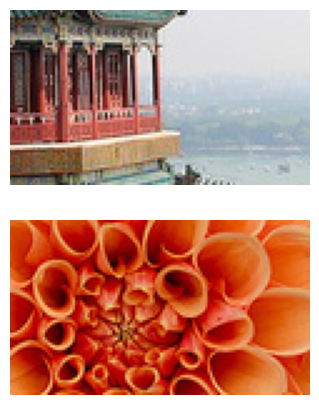

In [12]:
plt.figure(figsize=(5, 5))
plt.subplot(2,1, 1)
plt.imshow(images[0])
plt.axis("off")
plt.subplot(2,1, 2)
plt.imshow(images[1])
plt.axis("off")
plt.show()

In [8]:
images = tf.keras.layers.CenterCrop(height = 70, width = 120)(images)
images = tf.keras.layers.Rescaling(scale = 1/255)(images )
images.shape

TensorShape([2, 70, 120, 3])

In [9]:
tf.random.set_seed(42)
convLayer = tf.keras.layers.Conv2D(filters =32 , kernel_size=7)
featureMaps = convLayer(images)
featureMaps.shape

I0000 00:00:1755785010.855308    1153 cuda_dnn.cc:529] Loaded cuDNN version 90300


TensorShape([2, 64, 114, 32])

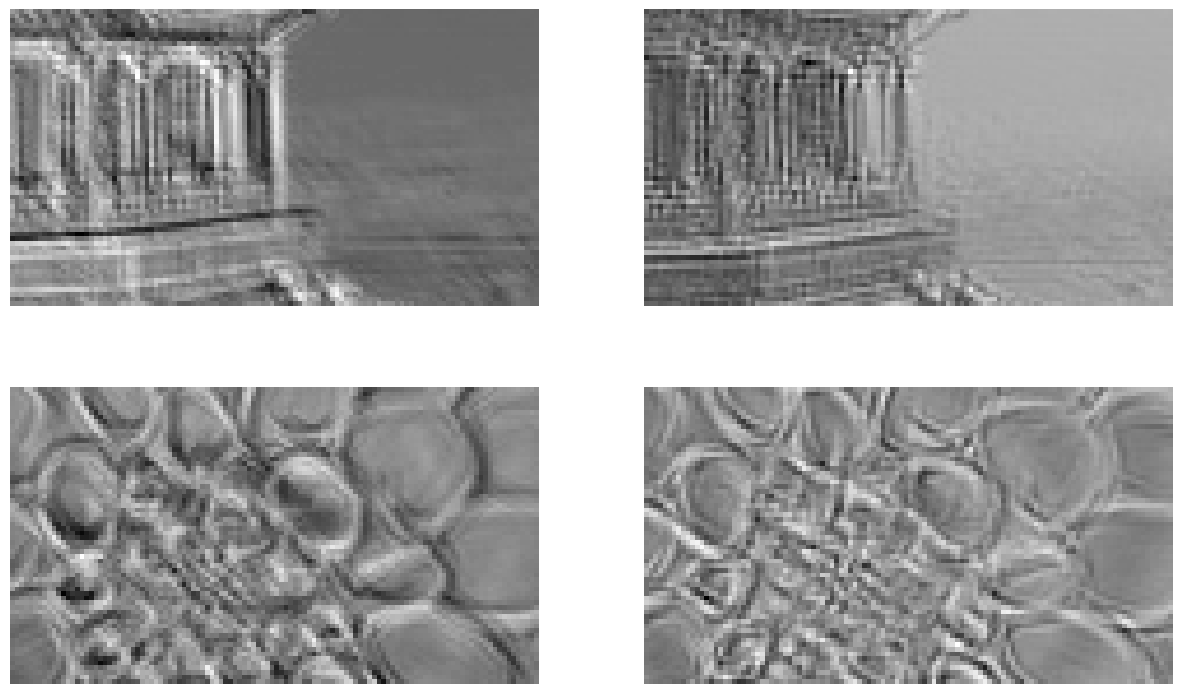

In [21]:
plt.figure(figsize=(15, 9))
for imageId in (0, 1):
    for fmapId in (0,1):
        plt.subplot(2, 2, imageId * 2 + fmapId + 1)
        plt.imshow(featureMaps[imageId, : , : , fmapId], cmap = "gray")
        plt.axis("off")
plt.show()

now with zero padding

In [22]:
convLayerPadding = tf.keras.layers.Conv2D(filters = 32, kernel_size=7, padding="same")
paddedFMaps = convLayerPadding(images)
paddedFMaps.shape

TensorShape([2, 70, 120, 32])

its the same as images shape .
Now with strides

In [24]:
convLayerStridesPadding = tf.keras.layers.Conv2D(
    filters = 32, 
    kernel_size=7, 
    padding="same",
    strides = 2)
paddedStridesFMaps = convLayerStridesPadding(images)
paddedStridesFMaps.shape

TensorShape([2, 35, 60, 32])